# Logistic Regression Investigation

#### Imports

In [32]:
import sys
import os
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from models.logistic_regression import LogisticRegression
from models.weighted_lr import WeightedLogisticRegression
from evaluator.model_evaluator import ModelEvaluator
from training.crossval import CrossValidator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay      



#### Load the datasets

In [33]:
X_train = pd.read_csv('../dataset/X_train.csv').values
X_test = pd.read_csv('../dataset/X_test.csv').values
y_train = pd.read_csv('../dataset/y_train.csv').values.ravel()
y_test = pd.read_csv('../dataset/y_test.csv').values.ravel()


### Logistic Regression

- checking logisric regression working as it should and use  Cross-Validation:

In [34]:
# Cross-validate Logistic Regression
lr = LogisticRegression(eta=0.05, epochs=3000, lambda_reg=0.1)
lr_cv_results = CrossValidator.cross_validate(lr, X_train, y_train, folds=10, random_state=42)
print("LR Mean Metrics:", lr_cv_results['mean_metrics'])

LR Mean Metrics: {'accuracy': np.float64(0.800014697420759), 'precision': np.float64(0.6508779165674577), 'recall': np.float64(0.5338584830955139), 'f1_score': np.float64(0.5857434853078087), 'f2_score': np.float64(0.553316853543988)}


LR Test Metrics: {'accuracy': np.float64(0.8231534090909091), 'precision': np.float64(0.6927899686520376), 'recall': np.float64(0.5940860215053764), 'f1_score': np.float64(0.6396526772793053), 'f2_score': np.float64(0.6115107913669066)}


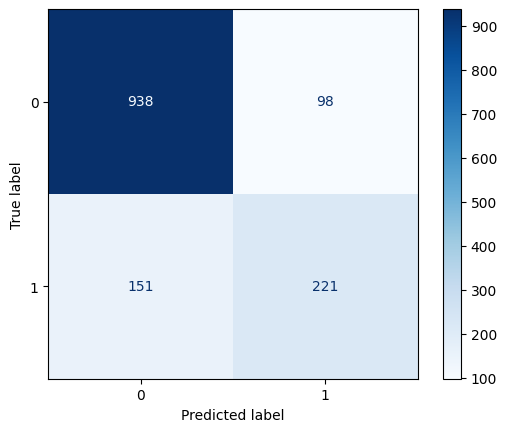

In [35]:
lr = LogisticRegression(eta=0.05, epochs=3000, lambda_reg=0.1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
metrics = ModelEvaluator.calculate_metrics(y_test, y_pred)
print("LR Test Metrics:", metrics)

matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot(cmap="Blues")
plt.show()

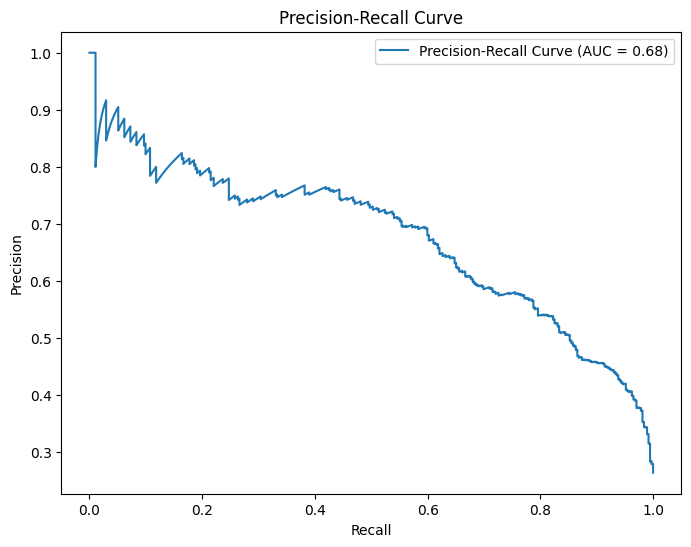

Best Threshold: 0.31
Precision at Best Threshold: 0.57
Recall at Best Threshold: 0.78
F1 Score at Best Threshold: 0.66


In [36]:
y_probs = lr.predict_proba_per_sample(X_test)
lr.plot_prec_recall(y_test, y_probs)


## Weighted Logistic Regression

### Cross-validation:

In [37]:
class_weights = {0: 5, 1: 10}  # Assign higher weight to class 1
wlr = WeightedLogisticRegression(eta=0.01, epochs=1000, lambda_reg=0.1, class_weights=class_weights,threshold=0.6)
wlr_cv_results = CrossValidator.cross_validate(wlr, X_train, y_train, folds=10, random_state=42)
print("LR Mean Metrics:", lr_cv_results['mean_metrics'])

LR Mean Metrics: {'accuracy': np.float64(0.800014697420759), 'precision': np.float64(0.6508779165674577), 'recall': np.float64(0.5338584830955139), 'f1_score': np.float64(0.5857434853078087), 'f2_score': np.float64(0.553316853543988)}


LR Test Metrics: {'accuracy': np.float64(0.8231534090909091), 'precision': np.float64(0.6927899686520376), 'recall': np.float64(0.5940860215053764), 'f1_score': np.float64(0.6396526772793053), 'f2_score': np.float64(0.6115107913669066)}


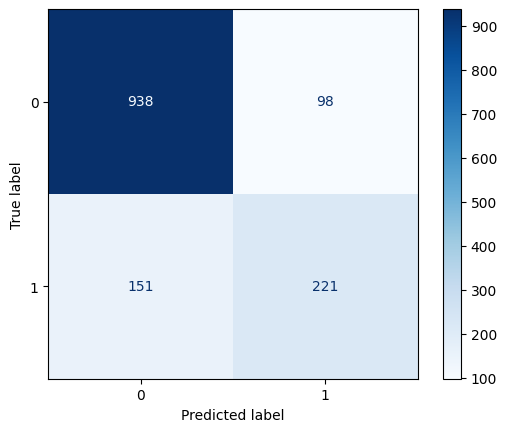

In [38]:
wlr = WeightedLogisticRegression(eta=0.05, epochs=3000, lambda_reg=0.1)
wlr.fit(X_train,y_train)
y_pred = wlr.predict(X_test)
metrics = ModelEvaluator.calculate_metrics(y_test, y_pred)
print("LR Test Metrics:", metrics)

matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot(cmap="Blues")
plt.show()

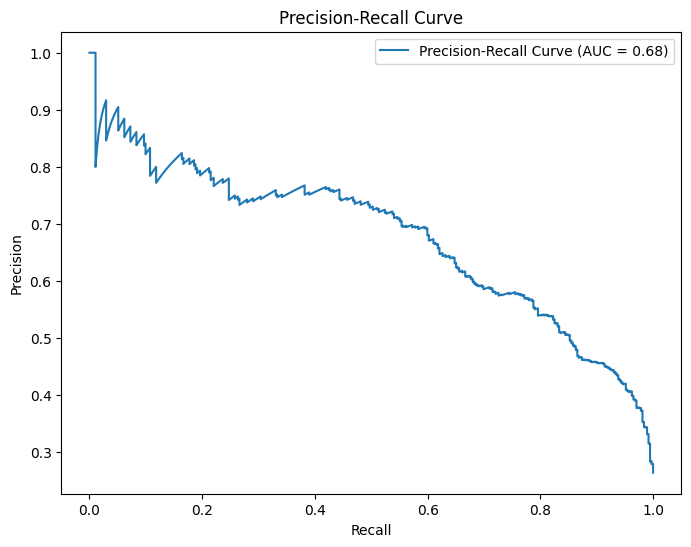

Best Threshold: 0.31
Precision at Best Threshold: 0.57
Recall at Best Threshold: 0.78
F1 Score at Best Threshold: 0.66


In [39]:
y_probs = wlr.predict_proba_per_sample(X_test)
wlr.plot_prec_recall(y_test, y_probs)